# Linking TNO (493480) 2014 YZ<sub>49</sub> from TESS difference images

See my full <a href="https://www.benengebreth.org/dynamic-sky/TESS/493480-2014-YZ49/">(493480) 2014 YZ<sub>49</sub></a> writeup for more details.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import skydelta as sd
import pickle
import itertools

%matplotlib inline

In [115]:
#load 6 previously generated thresholded 200x200px difference image frames containing 
#the (493480) 2014 YZ49 detections and the corresponding frame observation times
thresh_diffs, final_times = pickle.load(open("493480.dat","rb"))
print("Number of frames: %d" % len(thresh_diffs))
print("Number of observation times: %d" % len(final_times))

Number of frames: 6
Number of observation times: 6


In [116]:
#create composite difference image frame combining all 6 frame's detections onto one frame
thresh_composite = np.max(thresh_diffs,axis=0)

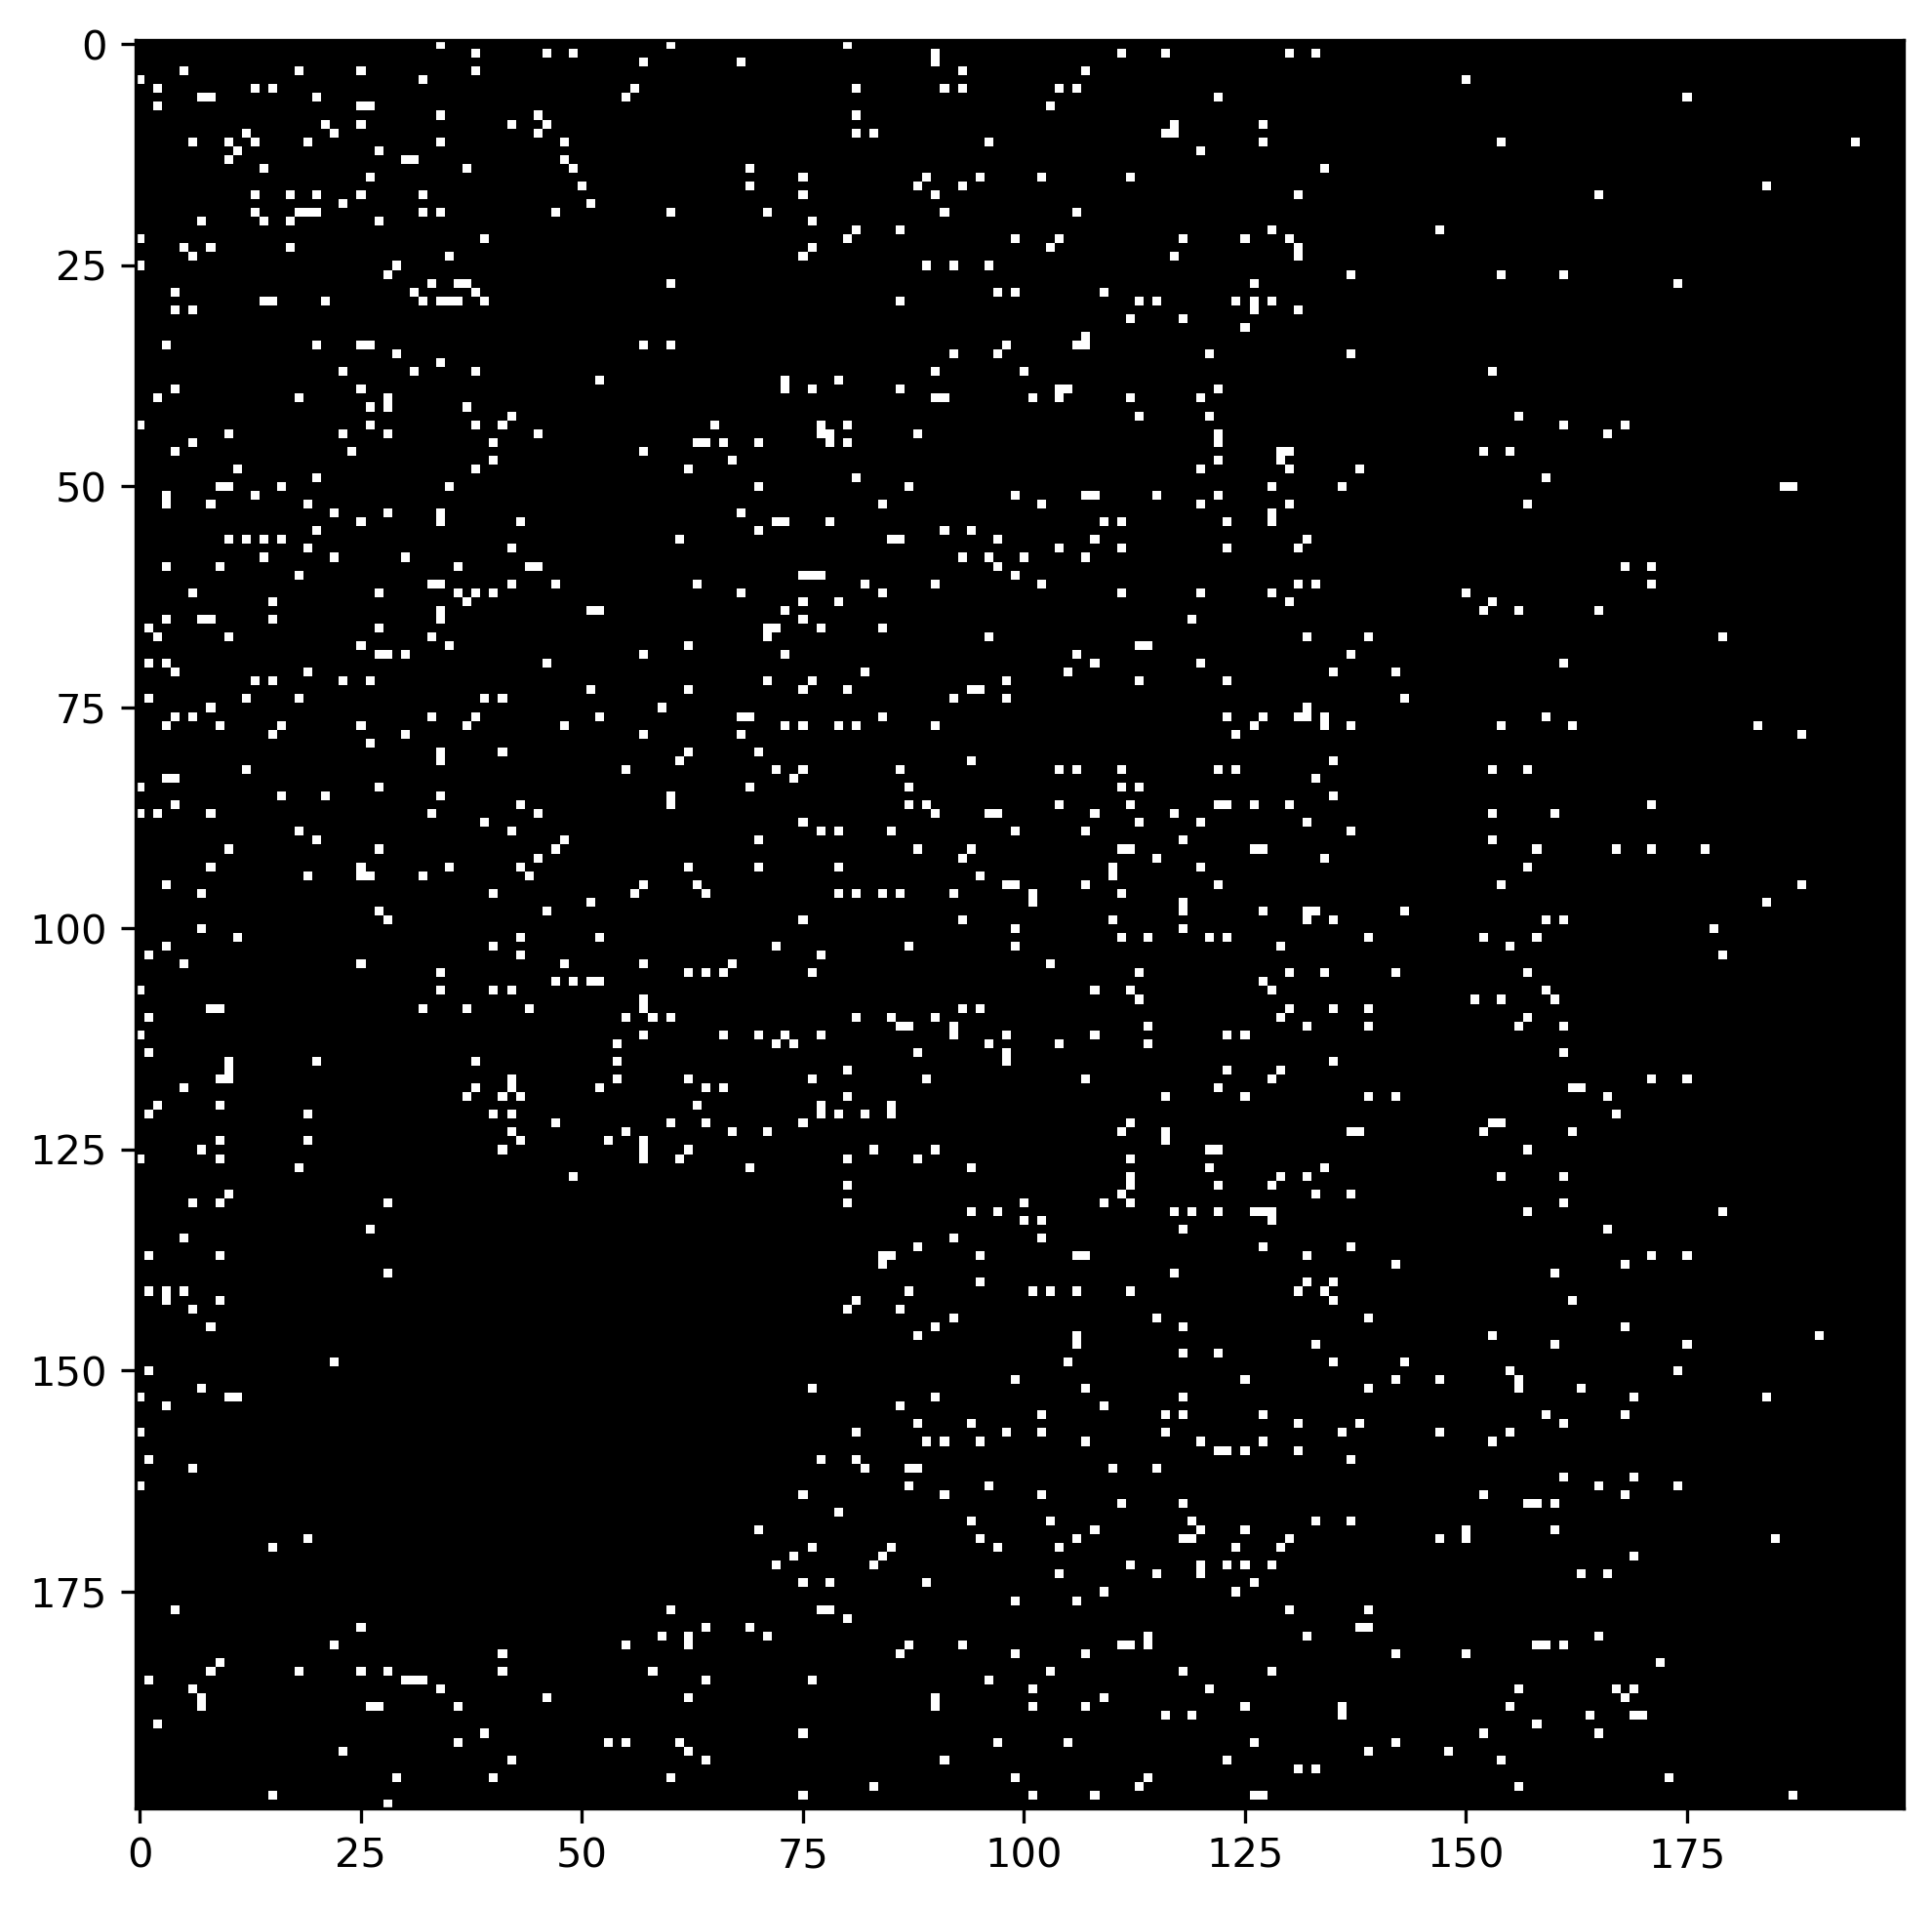

In [117]:
#thresholded detection pixels across all frames
plt.figure(figsize=(8,8),dpi=300)
plt.imshow(thresh_composite,cmap='gray')

In [118]:
#collect all detection centroids across all frames
bbf = sd.blobs_by_frame(thresh_diffs,centroid=True)
print("There are %d blobs across %d frames" % (len(bbf),len(thresh_diffs)))

There are 1197 blobs across 6 frames


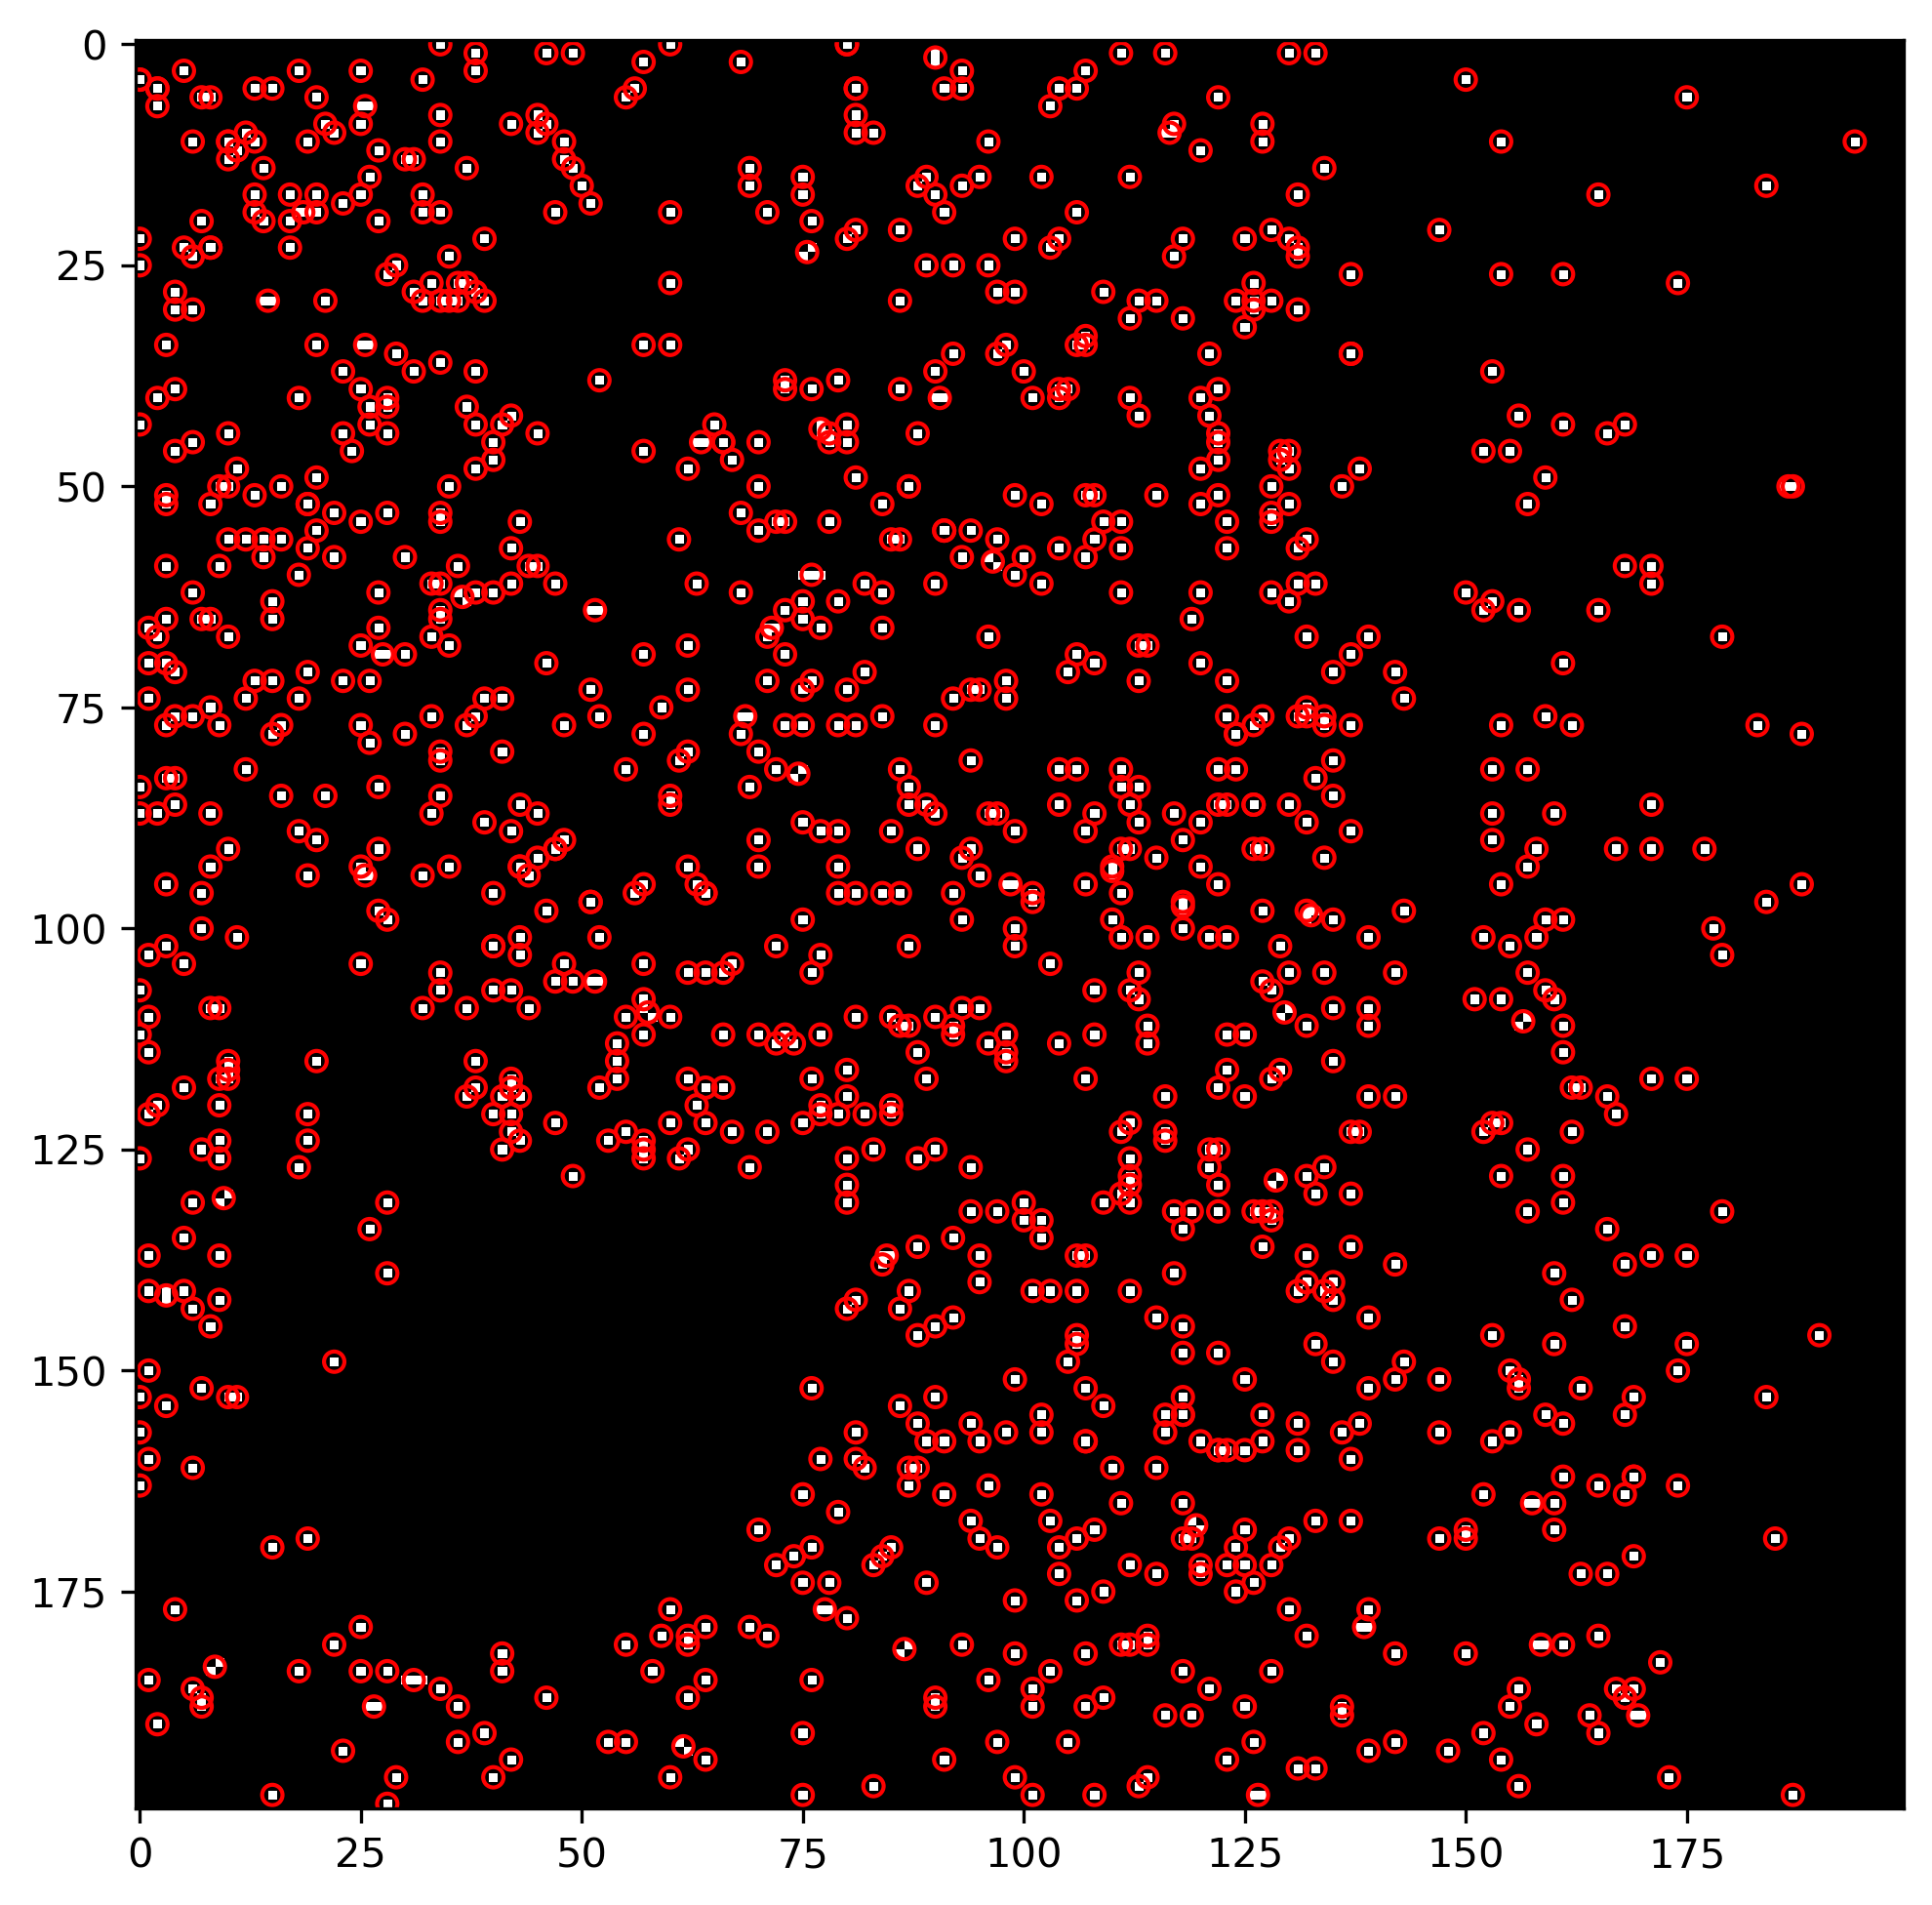

In [119]:
#show composite diff with detection centroid circled (most are single pixel detections anyway)
plt.figure(figsize=(8,8),dpi=300)
plt.imshow(thresh_composite,cmap='gray')
plt.scatter(bbf[:,1],bbf[:,0],s=25,facecolors='none',edgecolors='r')

In [120]:
#link blobs by pixel velocity vector clustering:
#search for detections that move at a specified pixel rate per day 
#range with respect to one another

#parameter description:
#9% tolerance around common velocity (0.09), 3.4-4.9 pixels/day constrained motion,
#require links in 6 frames at minimum, span at most 60 pixels for a link 

#these parameters highlight (493480) 2014 YZ49 which is moving at 3.7 pixels/day
links = sd.link_blobs(bbf,final_times,0.09,ppd=[3.4,3.9],min_frames=6,max_span=60)
print("Number of candidate links to test with OD: %d" % len(links))

Number of candidate links to test with OD: 3


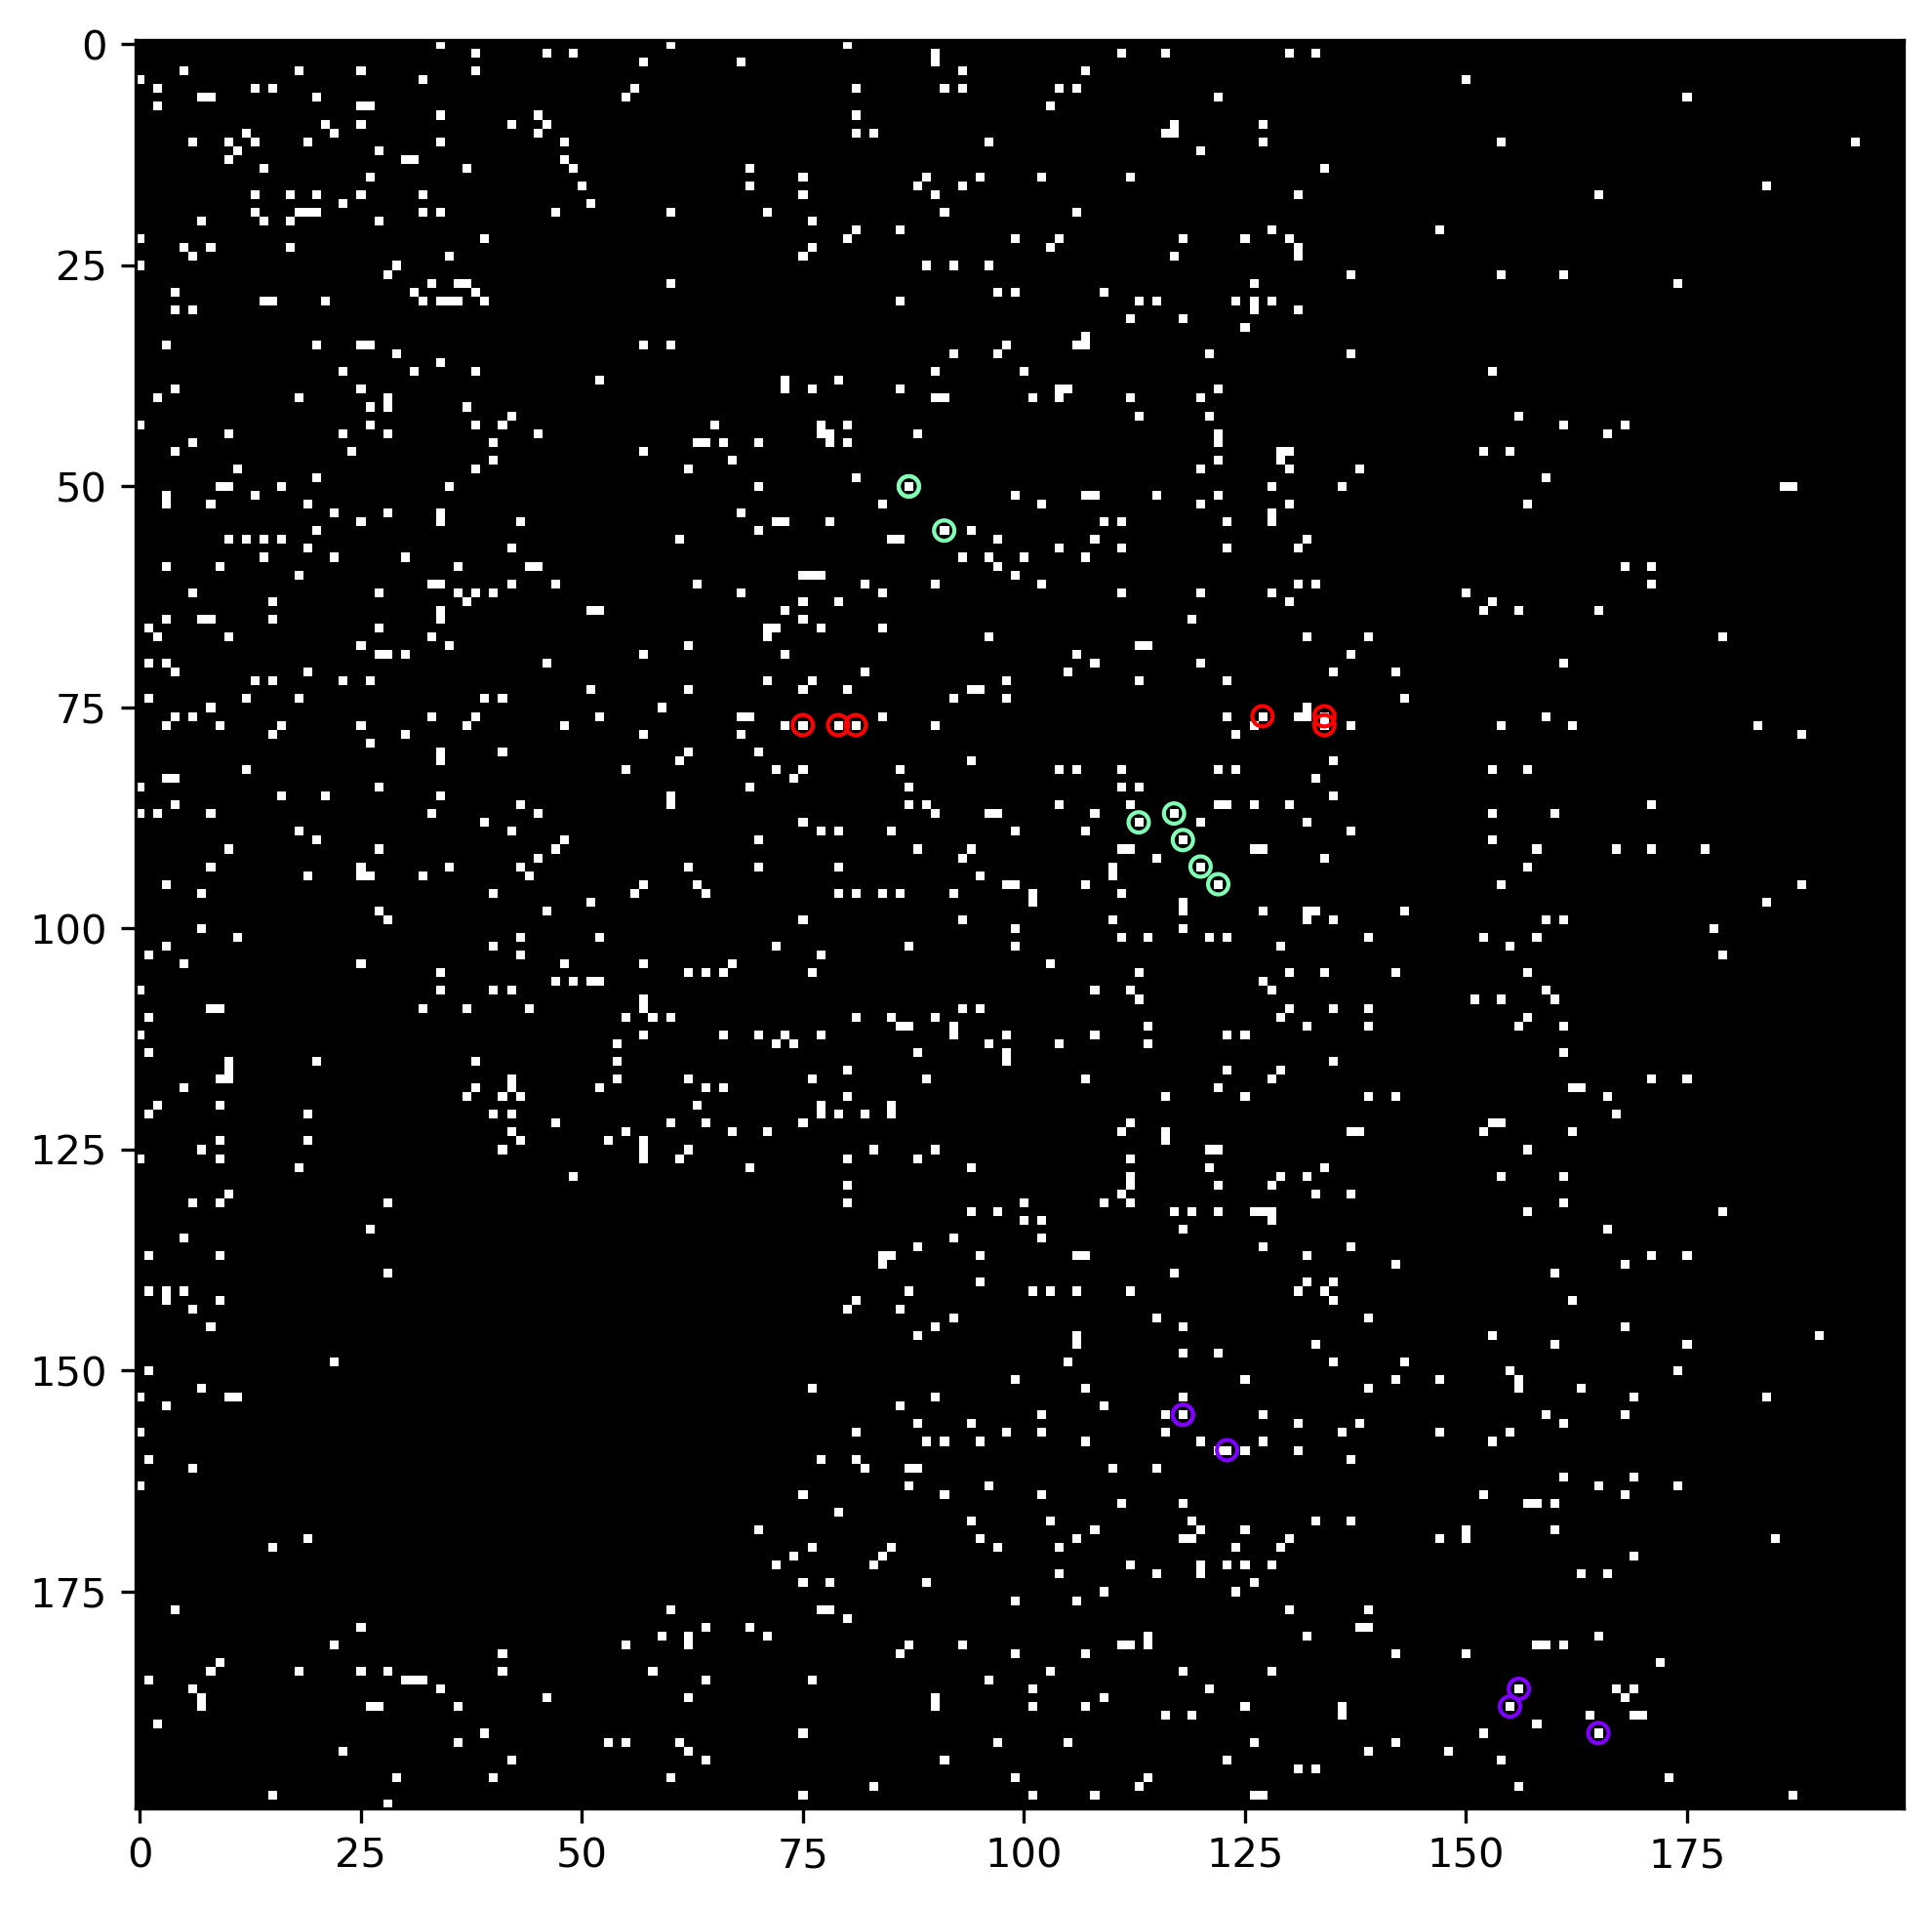

In [121]:
#plot candidate links (493480 2014 YZ49 is in red for the default parameters above)
#note: canidate links can share detections and overlap one another
#which makes links hard to discern for crowded detections using broader search params

plt.figure(figsize=(8,8),dpi=300)
plt.imshow(thresh_composite,cmap='gray')

colors = itertools.cycle(cm.rainbow(np.linspace(0, 1, len(links))))

for l in links:
    plt.scatter(bbf[l,1],bbf[l,0],s=25,facecolors='none',color=next(colors))